# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**JS1 GROUP: Gift Nhlenyama, Nokuphila Simelane, Kgotatso Melvy Malapane, Paulina Kolobe, Bethuel Masango**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [92]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = [...]

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# load the data
train = pd.read_csv('df_train.csv')
test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [93]:
# view the data
train.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [94]:
#finding out the dimensions of our data: 49 columns
train.shape

(8763, 49)

In [95]:
# taking a look at datatypes and null counts: 
    # most data is complete but one column with a significant number of missing values
    # we have 3 columns of the object data type indicating categorical values
    # the rest of the data is numeric with i.e one integer column and float columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [96]:
#grouping columns by data type and finding the counts: we can distinguish between categorical and numerical
print(train.dtypes.value_counts())

float64    45
object      3
int64       1
dtype: int64


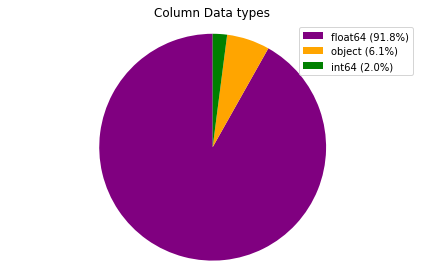

In [97]:
#large percentage of data is
labels = [r'float64 (91.8%)', r'object (6.1%)', 
r'int64 (2.0%)']
sizes = [45, 3, 1]
colors = ['purple', 'orange', 'green']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Column Data types')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

In [98]:
#seperate data into categorical and numerical data for easier data preparation
cat = ['time', 'Valencia_wind_deg', 'Seville_pressure']
num_data = train.drop(cat,axis=1)
cat_data = train[cat]

In [99]:
cat_data

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25
...,...,...,...
8758,2017-12-31 09:00:00,level_6,sp23
8759,2017-12-31 12:00:00,level_6,sp23
8760,2017-12-31 15:00:00,level_9,sp22
8761,2017-12-31 18:00:00,level_8,sp23


In [100]:
#visualizing categorical data
cat_data['time'].value_counts()

2015-01-01 03:00:00    1
2017-01-01 03:00:00    1
2016-12-31 09:00:00    1
2016-12-31 12:00:00    1
2016-12-31 15:00:00    1
                      ..
2016-01-01 00:00:00    1
2015-12-31 21:00:00    1
2015-12-31 18:00:00    1
2015-12-31 15:00:00    1
2017-12-31 21:00:00    1
Name: time, Length: 8763, dtype: int64

<Figure size 1440x1440 with 0 Axes>

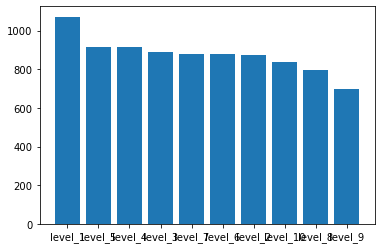

<Figure size 1440x1440 with 0 Axes>

In [101]:
val_deg_count = train['Valencia_wind_deg'].value_counts()
data = dict(val_deg_count)
wind_levels = list(data.keys())
values = list(data.values())
plt.bar(wind_levels, values)
plt.figure(figsize=(20,20))

<Figure size 3600x3600 with 0 Axes>

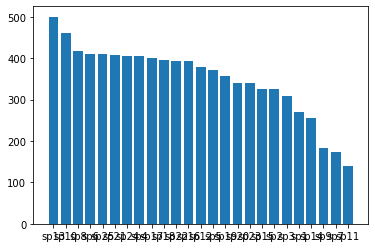

<Figure size 3600x3600 with 0 Axes>

In [102]:
sevil_press_count = train['Seville_pressure'].value_counts()
datap = dict(sevil_press_count)
pressure_levels = list(datap.keys())
valuesp = list(datap.values())
plt.bar(pressure_levels, valuesp)
plt.figure(figsize=(50,50))

In [103]:
#Visualizong numerical data
num_data.head()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [104]:
# evaluate correlation
c = num_data.corr()
s = c.unstack()
sorted_pairs = s.sort_values(kind="quicksort", ascending=False)

In [105]:
#Data that is positively correlated to the target variable:load_shortfall_3h
pos = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] > 0]
print(pos.head(18))

load_shortfall_3h     1.000000
Valencia_temp_min     0.201863
Barcelona_temp_min    0.195984
Unnamed: 0            0.192612
Madrid_temp           0.186036
Barcelona_temp        0.182673
Madrid_temp_max       0.182548
Bilbao_temp_max       0.180934
Bilbao_temp           0.176411
Madrid_temp_min       0.174744
Seville_temp_min      0.174718
Valencia_temp         0.173225
Bilbao_temp_min       0.172920
Barcelona_temp_max    0.164734
Seville_temp          0.159343
Bilbao_weather_id     0.145875
Valencia_temp_max     0.144270
Seville_temp_max      0.109834
dtype: float64


<AxesSubplot:>

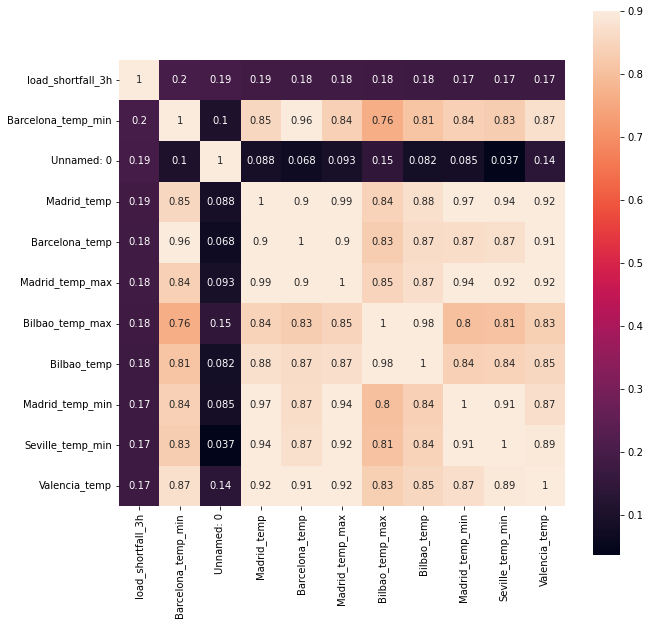

In [106]:
#positively correlated matrix
positive_corr_variables = ['load_shortfall_3h','Barcelona_temp_min','Unnamed: 0',           
'Madrid_temp',         
'Barcelona_temp',        
'Madrid_temp_max',       
'Bilbao_temp_max',       
'Bilbao_temp',           
'Madrid_temp_min',       
'Seville_temp_min',      
'Valencia_temp']
corrmat = num_data[positive_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=.9, square=True, annot=True)

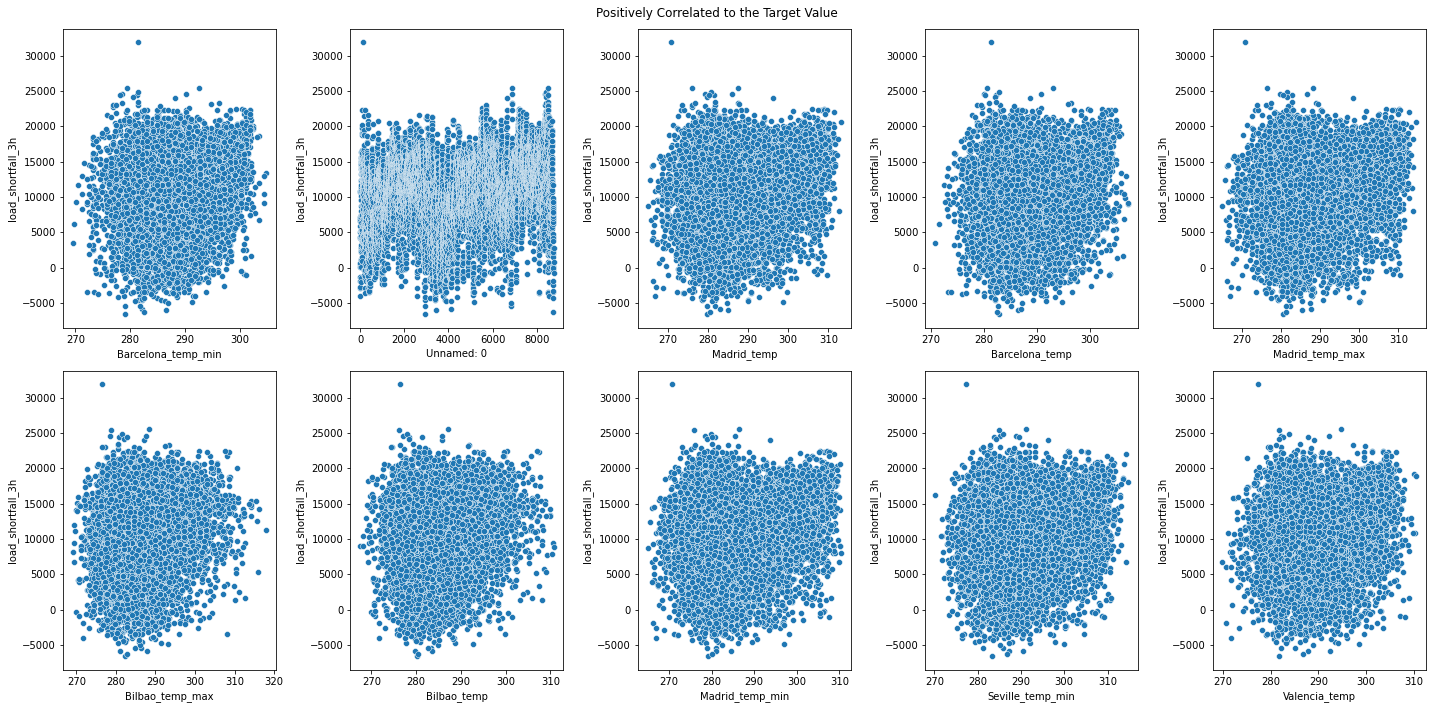

In [107]:
#scattter plots of positively correlated values        
fig, axs = plt.subplots(2, 5, figsize=(20,10))
sns.scatterplot(x=num_data['Barcelona_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[0,0])
sns.scatterplot(x=num_data['Unnamed: 0'], y=num_data['load_shortfall_3h'], ax=axs[0,1])
sns.scatterplot(x=num_data['Madrid_temp'], y=num_data['load_shortfall_3h'], ax=axs[0,2])
sns.scatterplot(x=num_data['Barcelona_temp'], y=num_data['load_shortfall_3h'], ax=axs[0,3])
sns.scatterplot(x=num_data['Madrid_temp_max'], y=num_data['load_shortfall_3h'], ax=axs[0,4])
sns.scatterplot(x=num_data['Bilbao_temp_max'], y=num_data['load_shortfall_3h'], ax=axs[1,0])
sns.scatterplot(x=num_data['Bilbao_temp'], y=num_data['load_shortfall_3h'], ax=axs[1,1])
sns.scatterplot(x=num_data['Madrid_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,2])
sns.scatterplot(x=num_data['Seville_temp_min'], y=num_data['load_shortfall_3h'], ax=axs[1,3])
sns.scatterplot(x=num_data['Valencia_temp'], y=num_data['load_shortfall_3h'], ax=axs[1,4])

fig.suptitle('Positively Correlated to the Target Value')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()


In [108]:
#Data that is negatively correlated to the target variable:load_shortfall_3h
neg = sorted_pairs['load_shortfall_3h'][sorted_pairs['load_shortfall_3h'] < 0]
neg

Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_rain_3h        -0.032945
Barcelona_pressure     -0.034385
Seville_wind_speed     -0.048433
Barcelona_rain_1h      -0.056633
Bilbao_wind_speed      -0.081602
Madrid_clouds_all      -0.081623
Seville_clouds_all     -0.091804
Barcelona_wind_speed   -0.103633
Barcelona_wind_deg     -0.116133
Bilbao_wind_deg        -0.120800
Bilbao_clouds_all      -0.127293
Valencia_wind_speed    -0.142791
Madrid_humidity        -0.150536
Madrid_wind_speed      -0.150981
Bilbao_rain_1h         -0.152510
Seville_humidity       -0.167290
dtype: float64

<AxesSubplot:>

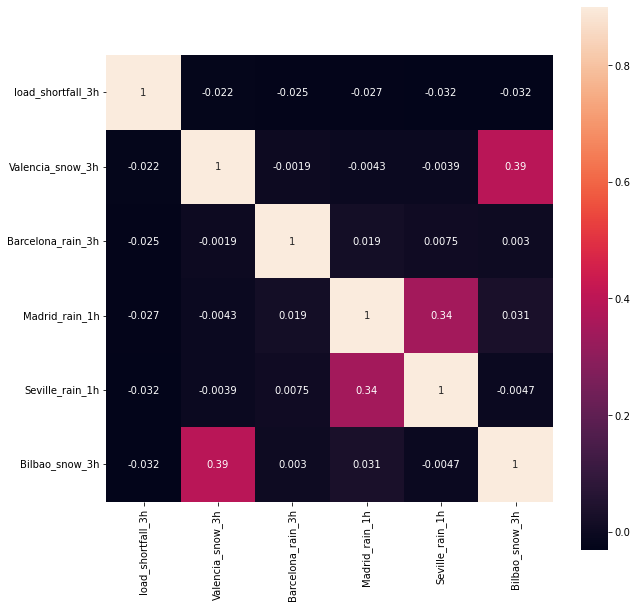

In [109]:
negative_corr_variables = ['load_shortfall_3h','Valencia_snow_3h',
'Barcelona_rain_3h',    
'Madrid_rain_1h',         
'Seville_rain_1h',       
'Bilbao_snow_3h']
corrmatneg = num_data[negative_corr_variables].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmatneg, vmax=.9, square=True, annot=True)

<AxesSubplot:xlabel='Barcelona_wind_speed', ylabel='load_shortfall_3h'>

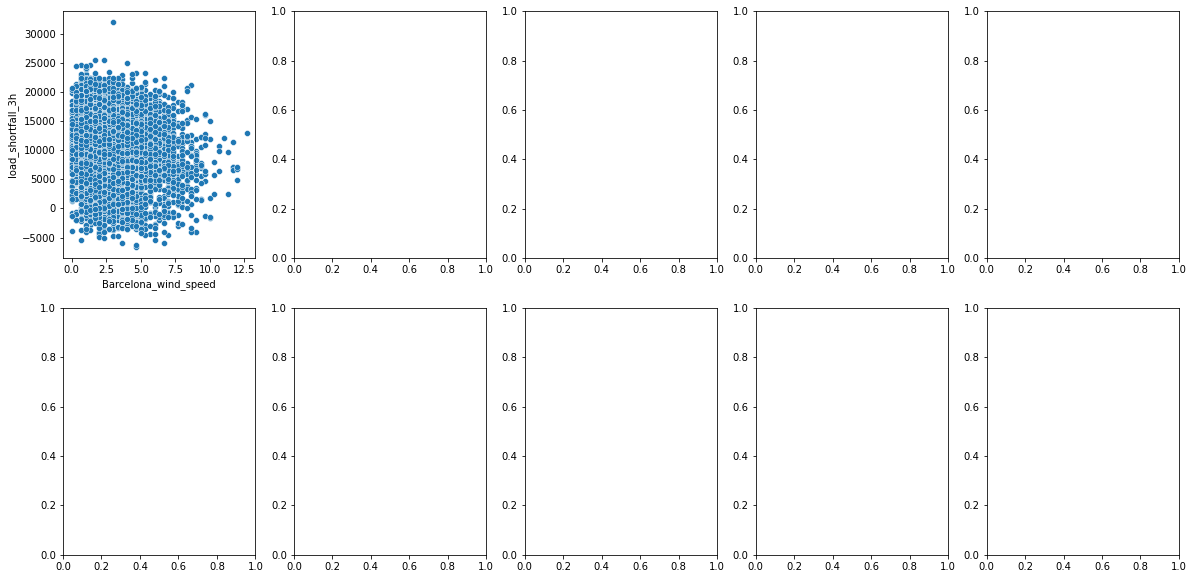

In [110]:

fig, axs = plt.subplots(2, 5, figsize=(20,10))
sns.scatterplot(x=num_data['Barcelona_wind_speed'], y=num_data['load_shortfall_3h'], ax=axs[0,0])
#sns.scatterplot(x=num_data['Barcelona_rain_3h'], y=num_data['load_shortfall_3h'], ax=axs[0,1])
#sns.scatterplot(x=num_data['Madrid_rain_1h'], y=num_data['load_shortfall_3h'], ax=axs[0,2])
#sns.scatterplot(x=num_data['Seville_rain_1h'], y=num_data['load_shortfall_3h'], ax=axs[0,3])
#sns.scatterplot(x=num_data['Bilbao_snow_3h'], y=num_data['load_shortfall_3h'], ax=axs[0,4])


In [111]:
sorted_pairs[46:95]

Madrid_temp         Madrid_temp_max       0.988871
Madrid_temp_max     Madrid_temp           0.988871
Valencia_temp       Valencia_temp_max     0.987533
Valencia_temp_max   Valencia_temp         0.987533
Valencia_temp_min   Valencia_temp         0.985479
Valencia_temp       Valencia_temp_min     0.985479
Bilbao_temp_min     Bilbao_temp           0.982936
Bilbao_temp         Bilbao_temp_min       0.982936
Bilbao_temp_max     Bilbao_temp           0.981624
Bilbao_temp         Bilbao_temp_max       0.981624
Barcelona_temp_max  Barcelona_temp        0.974480
Barcelona_temp      Barcelona_temp_max    0.974480
Madrid_temp         Madrid_temp_min       0.973641
Madrid_temp_min     Madrid_temp           0.973641
Barcelona_temp_min  Barcelona_temp        0.964089
Barcelona_temp      Barcelona_temp_min    0.964089
Seville_temp_min    Seville_temp          0.955160
Seville_temp        Seville_temp_min      0.955160
Valencia_temp_max   Valencia_temp_min     0.949377
Valencia_temp_min   Valencia_te

In [112]:
colinear_data = ['Madrid_temp', 'Madrid_temp_max','Valencia_temp','Valencia_temp_max','Valencia_temp_min',
'Valencia_temp','Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max','Bilbao_temp']

<AxesSubplot:>

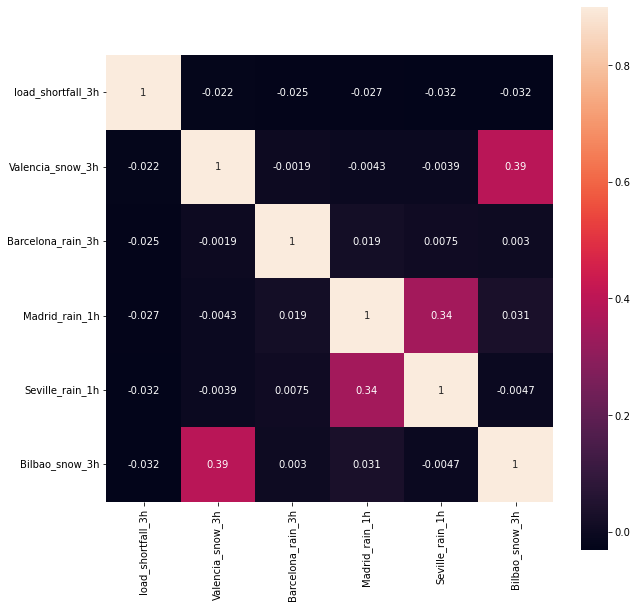

In [113]:
corrmatpair = num_data[colinear_data].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmatneg, vmax=.9, square=True, annot=True)

<AxesSubplot:xlabel='Madrid_temp', ylabel='Madrid_temp_max'>

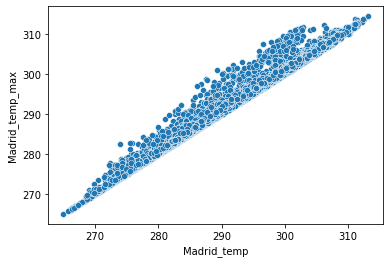

In [114]:
# scatter plot matrix
sns.scatterplot(x='Madrid_temp', 
                    y='Madrid_temp_max',
                    data=num_data)



In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic